### Visualizing data from Daru containers
DARU (Data Analysis in RUby) is a library for storage, analysis, manipulation and visualization of data. You can find information about daru in its [repository](https://github.com/v0dro/daru).

GnuplotRB takes from Daru::Vector or Daru::DataFrame *name* as dataset's *title* and *index* column as *xtic*. Example:

In [1]:
require 'daru'
require 'gnuplotrb'
include GnuplotRB
include GnuplotRB::Fit

df = Daru::DataFrame.new({
  Build: [312, 630, 315, 312],
  Test: [525, 1050, 701, 514],
  Deploy: [215, 441, 370, 220]
  },
  index: ['Run A', 'Run B', 'Run C', 'Run D']
)
df[:Overall] = df[:Build] + df[:Test] + df[:Deploy]
df

,Build,Deploy,Test,Overall
Run A,312,215,525,1052
Run B,630,441,1050,2121
Run C,315,370,701,1386
Run D,312,220,514,1046


When you pass DataFrame to Plot.new it uses every column of DataFrame as a dataset with column name as dataset title:

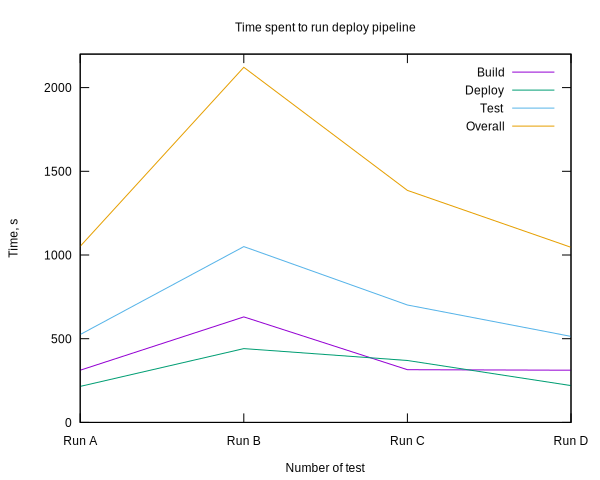

In [2]:
from_daru = Plot.new(
    df,
    style_data: 'lines',
    yrange: 0..2200,
    xlabel: 'Number of test',
    ylabel: 'Time, s',
    title: 'Time spent to run deploy pipeline'
)

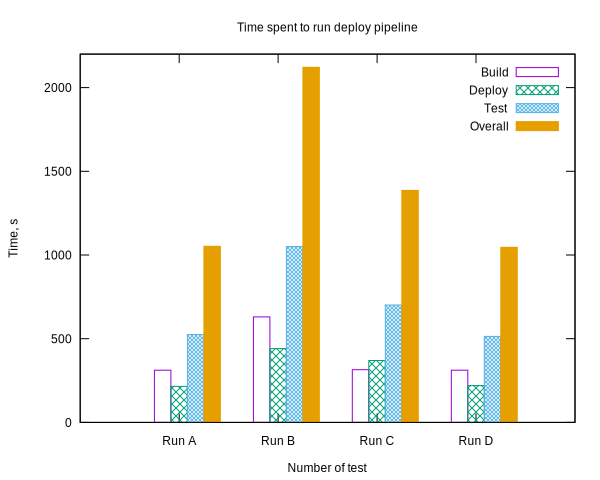

In [3]:
from_daru.options(
    style_data: 'histograms',
    style_fill: 'pattern border'
)

Datasets may be initialized both with Array or DataFrame:

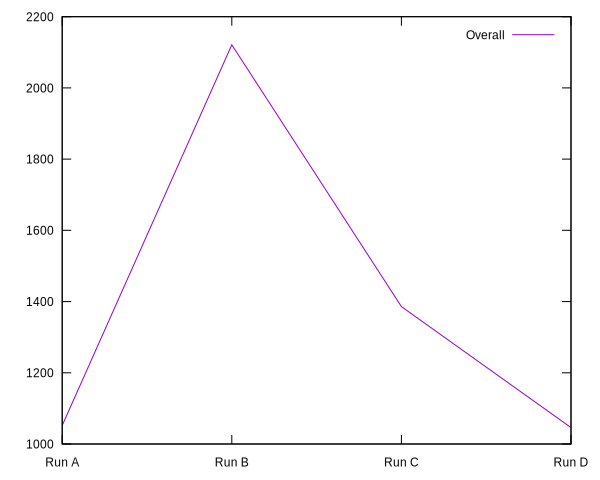

In [4]:
Plot.new([df[:Overall], with: 'lines'])

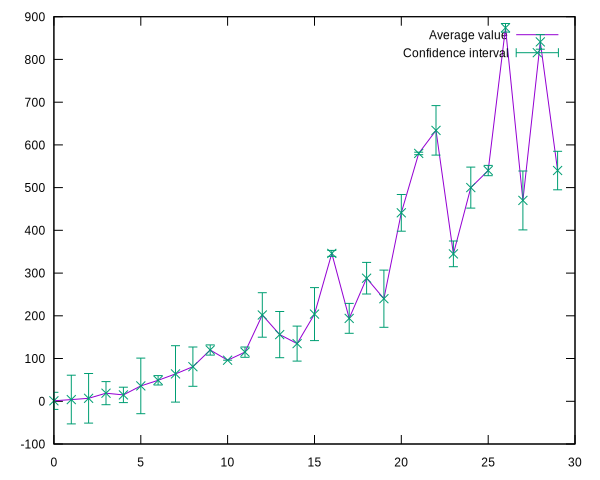

In [5]:
rows = (1..30).map do |i|
  [i**2 * (rand(4) + 3) / 5, rand(70)]
end
df = Daru::DataFrame.rows(rows, order: [:Value, :Error], name: 'Confidence interval')

random_points = Plot.new(
  [df[:Value], with: 'lines', title: 'Average value'],
  [df, with: 'err']
)

ok, and now lets try to fit it with polynomial:

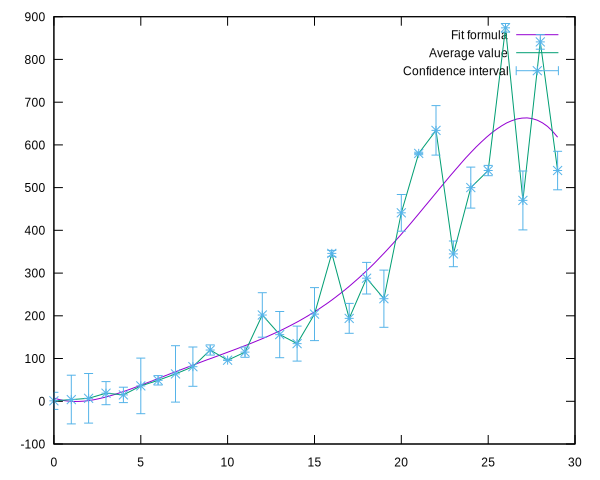

In [6]:
poly = fit_poly(df, degree: 5)
random_points.add_dataset(poly[:formula_ds])

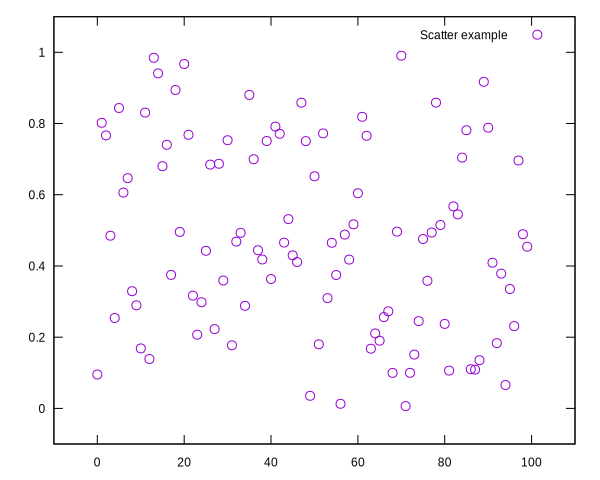

In [7]:
df = Daru::DataFrame.new({
    a: Array.new(100) {|i| i}, 
    b: 100.times.map{rand}
  },
  name: 'Scatter example'
)

Plot.new([df, pt: 6, ps: 1, using: '2:3'], xrange: -10..110, yrange: -0.1..1.1)

In [8]:
frames = 100.times.map do |i|
  Plot.new([df.row[0..i], using: '2:3', pt: 6, ps: 1])
end

Animation.new(*frames, xrange: -10..110, yrange: -0.1..1.1)

#<GnuplotRB::Animation:0x000000043bfc50 @plots=Hamster::Vector[#<GnuplotRB::Plot:0x0000000423c798 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x0000000423c720 @type=:datablock, @data=#<GnuplotRB::Datablock:0x0000000423c248 @stored_in_file=false, @data="0 0 0.09507238721609235\n">, @options=Hamster::Hash[:pt => 6, :using => "2:3", :title => :"Scatter example", :ps => 1]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000042498d0 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000004249858 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000004249380 @stored_in_file=false, @data="0 0 0.09507238721609235\n1 1 0.8021284949851002\n">, @options=Hamster::Hash[:pt => 6, :using => "2:3", :title => :"Scatter example", :ps => 1]>], @cmd="plot ">, #<GnuplotRB::Plot:0x00000004255978 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000004255900 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000004255428 @stored_in_file=false, @data="0 0 0.09507238721609235\n1 1 0.8021284949851002\n2 2 0.7667035132916125\n">, @options=Hamster::Hash[:pt => 6, :using => "2:3", :title => :"Scatter example", :ps => 1]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000042608c8 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000004260850 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000004260378 @stored_in_file=false, @data="0 0 0.09507238721609235\n1 1 0.8021284949851002\n2 2 0.7667035132916125\n3 3 0.4850262893158571\n">, @options=Hamster::Hash[:pt => 6, :using => "2:3", :title => :"Scatter example", :ps => 1]>], @cmd="plot ">, #<GnuplotRB::Plot:0x0000000427a638 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x0000000427a5c0 @type=:datablock, @data=#<GnuplotRB::Datablock:0x0000000427a0e8 @stored_in_file=false, @data="0 0 0.09507238721609235\n1 1 0.8021284949851002\n2 2 0.7667035132916125\n3 3 0.4850262893158571\n4 4 0.2539718598416435\n">, @options=Hamster::Hash[:pt => 6, :using => "2:3", :title => :"Scatter example", :ps => 1]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000042970f8 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x00000004297080 @type=:datablock, @data=#<GnuplotRB::Datablock:0x00000004296ba8 @stored_in_file=false, @data="0 0 0.09507238721609235\n1 1 0.8021284949851002\n2 2 0.7667035132916125\n3 3 0.4850262893158571\n4 4 0.2539718598416435\n5 5 0.8436649982506127\n">, @options=Hamster::Hash[:pt => 6, :using => "2:3", :title => :"Scatter example", :ps => 1]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000042ae8c0 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x000000042ae848 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000042ae370 @stored_in_file=false, @data="0 0 0.09507238721609235\n1 1 0.8021284949851002\n2 2 0.7667035132916125\n3 3 0.4850262893158571\n4 4 0.2539718598416435\n5 5 0.8436649982506127\n6 6 0.6058757772506509\n">, @options=Hamster::Hash[:pt => 6, :using => "2:3", :title => :"Scatter example", :ps => 1]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000042c4cb0 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x000000042c4c38 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000042c4760 @stored_in_file=false, @data="0 0 0.09507238721609235\n1 1 0.8021284949851002\n2 2 0.7667035132916125\n3 3 0.4850262893158571\n4 4 0.2539718598416435\n5 5 0.8436649982506127\n6 6 0.6058757772506509\n7 7 0.6467934668181707\n">, @options=Hamster::Hash[:pt => 6, :using => "2:3", :title => :"Scatter example", :ps => 1]>], @cmd="plot ">, #<GnuplotRB::Plot:0x000000042e9c40 @options=Hamster::Hash[], @datasets=Hamster::Vector[#<GnuplotRB::Dataset:0x000000042e9bc8 @type=:datablock, @data=#<GnuplotRB::Datablock:0x000000042e96f0 @stored_in_file=false, @data="0 0 0.09507238721609235\n1 1 0.8021284949851002\n2 2 0.7667035132916125\n3 3 0.4850262893158571\n4 4 0.2539718598416435\n5 5 0.8436649982506127\n6 6 0.6058757772506509\n7 7 0.6467934668181707\n8 8 0